In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option("display.precision", 4)

from modules.helpers import parseMatrixRows, parseMatrixColumns, parseMatrixIndexes
from modules.plot import highlightNotZero, plotSchema

from modules.model import BarProps
from modules.model import Point, Bar
from modules.matrices import LoadMatrix, BarMatrices, modelMatrix
from modules.internalForces import *

In [2]:
crossSection = {"width": 200, "height": 300}
material = "C30/37"
barProps = BarProps(material, crossSection)
print(f'E = {barProps.E} kPa \nI = {barProps.I} m-4\nA = {barProps.A} m2')

E = 33000000.0 kPa 
I = 0.00044999999999999993 m-4
A = 0.06 m2


In [3]:
F = 40 #kN
Q = 5 #kN/m
load_bar12 = Load(Q = Q)
load_bar23 = Load(F = F, F_position=0.5)
load_bar34 = Load(Q=0, F=0)

In [4]:
p1 = Point(0,0, "bod 1", [0,1,2])
p2 = Point(0,3, "bod 2", [3,4,5])
p3 = Point(3,3, "bod 3", [6,7,8])
p4 = Point(3,0, "bod 4", [9,10,11])


In [5]:
p1.stiff #votknutie v bode 1
p4.hinge #klbova podpera v bode 4
print(f'p1 = {p1}\n p2 = {p2}\n p3 = {p3}\n p4 = {p4}')


p1 = Point(x=0, y=0, name='bod 1', codeNumbers=[0, 1, 2], dof=[0, 0, 0])
 p2 = Point(x=0, y=3, name='bod 2', codeNumbers=[3, 4, 5], dof=[1, 1, 1])
 p3 = Point(x=3, y=3, name='bod 3', codeNumbers=[6, 7, 8], dof=[1, 1, 1])
 p4 = Point(x=3, y=0, name='bod 4', codeNumbers=[9, 10, 11], dof=[0, 0, 1])


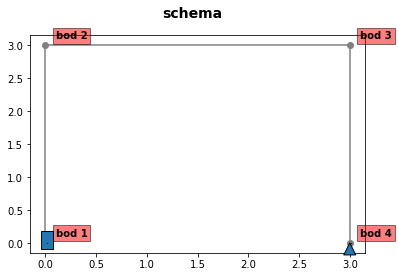

In [6]:
plotSchema([p1,p2,p3,p4])

In [7]:
bar12 = Bar(p1, p2)
bar23 = Bar(p2, p3)
bar34 = Bar(p3, p4)
print(f'bar12 = {bar12.len} m \nbar23 = {bar23.len} m\nbar34 = {bar34.len} m')

bar12 = 3.0 m 
bar23 = 3.0 m
bar34 = 3.0 m


In [8]:
def barSolution(bar, barProps, load):
    # print bar geometry
    [lx, ly] = bar.l_xy
    alfa = bar.angle
    print(f'bar properties \nalfa = {alfa} deg')
    print(f'lx = {lx}\nly = {ly}')

    # print stiffness matrix
    bar_matrices = BarMatrices(barProps, bar)
    A0 = bar_matrices.rotation
    B0 = bar_matrices.transmission
    k = bar_matrices.gss_stiffness
    k = parseMatrixIndexes(k, bar.codeNumbers)
    print('------------------------')
    print(
        f'stiffness matrix \n{k}\n rotation matrix \n{A0}\n transmission matrix \n{B0}')

    # calculate primary internal forces
    IntF = InternalForces_primary(load, bar)

    # print load vector
    FA_l = LoadMatrix.lss(0, IntF.Va, IntF.Ma)
    FB_l = LoadMatrix.lss(0, IntF.Vb, IntF.Mb)
    FA_g = LoadMatrix.gss(FA_l, A0.T)
    FB_g = LoadMatrix.gss(FB_l, A0.T)

    F = LoadMatrix.super(FA_g, FB_g)
    F = parseMatrixRows(F, bar.codeNumbers)
    print('------------------------')
    print(f'load vector \n{F}')

    toReturn = {
        "bar" : bar,
        "barProps": barProps,
        "lx" : lx,
        "ly" : ly,
        "alfa" : alfa,
        "A0" : A0,
        "B0" : B0,
        "k" : k,
        "F" : F,
        "FA_g" : FA_g,
        "FB_g" : FB_g,
    }
    return toReturn


In [9]:
bar12_Solution = barSolution(bar12, barProps, load_bar12)

bar properties 
alfa = -90.0 deg
lx = 0
ly = -3
------------------------
stiffness matrix 
            0           1           2           3           4           5
0  6.6000e+03 -4.0009e-11  9.9000e+03 -6.6000e+03  4.0009e-11  9.9000e+03
1 -4.0009e-11  6.6000e+05  6.0620e-13  4.0009e-11 -6.6000e+05 -1.2063e-10
2  9.9000e+03  6.0620e-13  1.9800e+04 -9.9000e+03 -6.0620e-13  9.9000e+03
3 -6.6000e+03  4.0009e-11 -9.9000e+03  6.6000e+03 -4.0009e-11 -9.9000e+03
4  4.0009e-11 -6.6000e+05 -6.0620e-13 -4.0009e-11  6.6000e+05  1.2063e-10
5  9.9000e+03 -1.2063e-10  9.9000e+03 -9.9000e+03  1.2063e-10  1.9800e+04
 rotation matrix 
            0           1  2
0  6.1232e-17 -1.0000e+00  0
1  1.0000e+00  6.1232e-17  0
2  0.0000e+00  0.0000e+00  1
 transmission matrix 
   0  1  2
0 -1  0  0
1  0 -1  0
2  3  0 -1
------------------------
load vector 
            0
0 -7.5000e+00
1 -4.5924e-16
2 -3.7500e+00
3 -7.5000e+00
4 -4.5924e-16
5  3.7500e+00


In [10]:
bar23_Solution = barSolution(bar23,barProps, load_bar23)

bar properties 
alfa = 0.0 deg
lx = 3
ly = 0
------------------------
stiffness matrix 
          3       4        5         6       7        8
3  660000.0     0.0      0.0 -660000.0     0.0      0.0
4       0.0  6600.0   9900.0       0.0 -6600.0   9900.0
5       0.0  9900.0  19800.0       0.0 -9900.0   9900.0
6 -660000.0     0.0      0.0  660000.0     0.0      0.0
7       0.0 -6600.0  -9900.0       0.0  6600.0  -9900.0
8       0.0  9900.0   9900.0       0.0 -9900.0  19800.0
 rotation matrix 
     0    1  2
0  1.0  0.0  0
1 -0.0  1.0  0
2  0.0  0.0  1
 transmission matrix 
   0  1  2
0 -1  0  0
1  0 -1  0
2  0  3 -1
------------------------
load vector 
      0
3   0.0
4 -20.0
5 -15.0
6   0.0
7 -20.0
8  15.0


In [11]:
bar34_Solution = barSolution(bar34, barProps, load_bar34)

bar properties 
alfa = 90.0 deg
lx = 0
ly = 3
------------------------
stiffness matrix 
            6           7           8           9           10          11
6   6.6000e+03  4.0009e-11 -9.9000e+03 -6.6000e+03 -4.0009e-11 -9.9000e+03
7   4.0009e-11  6.6000e+05  6.0620e-13 -4.0009e-11 -6.6000e+05 -1.2063e-10
8  -9.9000e+03  6.0620e-13  1.9800e+04  9.9000e+03 -6.0620e-13  9.9000e+03
9  -6.6000e+03 -4.0009e-11  9.9000e+03  6.6000e+03  4.0009e-11  9.9000e+03
10 -4.0009e-11 -6.6000e+05 -6.0620e-13  4.0009e-11  6.6000e+05  1.2063e-10
11 -9.9000e+03 -1.2063e-10  9.9000e+03  9.9000e+03  1.2063e-10  1.9800e+04
 rotation matrix 
            0           1  2
0  6.1232e-17  1.0000e+00  0
1 -1.0000e+00  6.1232e-17  0
2  0.0000e+00  0.0000e+00  1
 transmission matrix 
   0  1  2
0 -1  0  0
1  0 -1  0
2 -3  0 -1
------------------------
load vector 
      0
6   0.0
7   0.0
8   0.0
9   0.0
10  0.0
11  0.0


In [12]:
k1 = bar12_Solution['k']
k2 = bar23_Solution['k']
k3 = bar34_Solution['k']


In [13]:
modelMatrix = modelMatrix([k1,k2,k3])
modelMatrix.style\
.format('{:.2e}')\
.applymap(highlightNotZero)

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.60e+03,-4.00e-11,9.90e+03,-6.60e+03,4.00e-11,9.90e+03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1,-4.00e-11,6.60e+05,6.06e-13,4.00e-11,-6.60e+05,-1.21e-10,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
2,9.90e+03,6.06e-13,1.98e+04,-9.90e+03,-6.06e-13,9.90e+03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
3,-6.60e+03,4.00e-11,-9.90e+03,6.67e+05,-4.00e-11,-9.90e+03,-6.60e+05,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
4,4.00e-11,-6.60e+05,-6.06e-13,-4.00e-11,6.67e+05,9.90e+03,0.00e+00,-6.60e+03,9.90e+03,0.00e+00,0.00e+00,0.00e+00
5,9.90e+03,-1.21e-10,9.90e+03,-9.90e+03,9.90e+03,3.96e+04,0.00e+00,-9.90e+03,9.90e+03,0.00e+00,0.00e+00,0.00e+00
6,0.00e+00,0.00e+00,0.00e+00,-6.60e+05,0.00e+00,0.00e+00,6.67e+05,4.00e-11,-9.90e+03,-6.60e+03,-4.00e-11,-9.90e+03
7,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-6.60e+03,-9.90e+03,4.00e-11,6.67e+05,-9.90e+03,-4.00e-11,-6.60e+05,-1.21e-10
8,0.00e+00,0.00e+00,0.00e+00,0.00e+00,9.90e+03,9.90e+03,-9.90e+03,-9.90e+03,3.96e+04,9.90e+03,-6.06e-13,9.90e+03
9,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-6.60e+03,-4.00e-11,9.90e+03,6.60e+03,4.00e-11,9.90e+03


In [14]:
def boundaryConditionsVector(points: list) -> list:
    dofList=[]
    for point in points:
        dofList.append(point.dof)
    return pd.DataFrame(np.array(dofList).flatten())
    
def boundaryConditionsFilter(bc_vector, cond):
    bc = np.array(bc_vector).flatten()
    df = pd.DataFrame(bc)
    return df[df[0]==cond].index.values.astype(int)

def loadVector(F1,F2,F3):
    x = F1.add(F2,fill_value=0)
    return x.add(F3,fill_value=0)


In [15]:
F1 = bar12_Solution['F']
F2 = bar23_Solution['F']
F3 = bar34_Solution['F']


In [16]:
loadVector = loadVector(F1,F2,F3)
loadVector

,0
0,-7.5000e+00
1,-4.5924e-16
2,-3.7500e+00
3,-7.5000e+00
4,-2.0000e+01
5,-1.1250e+01
6,0.0000e+00
7,-2.0000e+01
8,1.5000e+01
9,0.0000e+00


In [17]:
bc_vector = boundaryConditionsVector([p1,p2,p3,p4])
bc_0 = boundaryConditionsFilter(bc_vector, 0)
loadVector.drop(bc_0, inplace=True)
loadVector

,0
3,-7.50
4,-20.00
5,-11.25
6,0.00
7,-20.00
8,15.00
11,0.00


In [18]:
bc_1 = boundaryConditionsFilter(bc_vector, 1)
copyModelMatrix = modelMatrix.copy()
copyModelMatrix.drop(bc_0, inplace=True)
filteredModelMatrix = copyModelMatrix[bc_1]
parseMatrixIndexes(filteredModelMatrix.copy(), ["u[2]", "v[2]", "fi[2]","u[3]", "v[3]", "fi[3]","fi[4]"])

,u[2],v[2],fi[2],u[3],v[3],fi[3],fi[4]
u[2],6.6660e+05,-4.0009e-11,-9900.0,-6.6000e+05,0.0000e+00,0.0,0.0000e+00
v[2],-4.0009e-11,6.6660e+05,9900.0,0.0000e+00,-6.6000e+03,9900.0,0.0000e+00
fi[2],-9.9000e+03,9.9000e+03,39600.0,0.0000e+00,-9.9000e+03,9900.0,0.0000e+00
u[3],-6.6000e+05,0.0000e+00,0.0,6.6660e+05,4.0009e-11,-9900.0,-9.9000e+03
v[3],0.0000e+00,-6.6000e+03,-9900.0,4.0009e-11,6.6660e+05,-9900.0,-1.2063e-10
fi[3],0.0000e+00,9.9000e+03,9900.0,-9.9000e+03,-9.9000e+03,39600.0,9.9000e+03
fi[4],0.0000e+00,0.0000e+00,0.0,-9.9000e+03,-1.2063e-10,9900.0,1.9800e+04


In [19]:
def nodeDisplacements(modelMatrix):
    inv = pd.DataFrame(np.linalg.inv(modelMatrix.values), modelMatrix.columns, modelMatrix.index)
    return inv.dot(loadVector)*-1

In [20]:
displacements = nodeDisplacements(filteredModelMatrix)
parseMatrixRows(displacements.copy(), ["u[2]", "v[2]", "fi[2]","u[3]", "v[3]", "fi[3]","fi[4]"])

,0
u[2],1.6088e-03
v[2],2.4897e-05
fi[2],7.9611e-04
u[3],1.6016e-03
v[3],3.5709e-05
fi[3],-4.2848e-04
fi[4],1.0150e-03


In [21]:
def modelDisplacements(displacements):
     return pd.DataFrame(np.zeros((12, 1))).add(displacements, fill_value=0)

In [22]:
modelDisplacements = modelDisplacements(displacements)
rows = ["u[1]", "v[1]", "fi[1]","u[2]", "v[2]", "fi[2]","u[3]", "v[3]", "fi[3]","u[4]", "v[4]", "fi[4]"]
parseMatrixRows(modelDisplacements.copy(), rows)

,0
u[1],0.0000e+00
v[1],0.0000e+00
fi[1],0.0000e+00
u[2],1.6088e-03
v[2],2.4897e-05
fi[2],7.9611e-04
u[3],1.6016e-03
v[3],3.5709e-05
fi[3],-4.2848e-04
u[4],0.0000e+00


In [38]:
# calculate internal forces by formula --- F = F' + k * delta
def barInternalForces(modelDisplacements, barSolution):

    bar = barSolution["bar"]
    barProps = barSolution["barProps"]

    # get bar displacements (delta)
    delta_1 = modelDisplacements.loc[bar.codeNumbers[0]:bar.codeNumbers[2]]
    delta_2 = modelDisplacements.loc[bar.codeNumbers[3]:bar.codeNumbers[5]]
    deltaBar = pd.concat([delta_1, delta_2])

    
    # get bar matrices
    A0 = barSolution["A0"]
    k = barSolution["k"]

    # u = k * delta
    u = k.dot(deltaBar)

    # F' --- node A
    A0_A_parsed = parseMatrixIndexes(A0, bar.codeNumbers[0:3])
    FA_g = barSolution["FA_g"]
    F_A_g_parsed = parseMatrixRows(FA_g, bar.codeNumbers[0:3])

    # F' --- node B
    A0_B_parsed = parseMatrixIndexes(A0, bar.codeNumbers[3:6])
    FB_g = barSolution["FB_g"]
    F_B_g_parsed = parseMatrixRows(FB_g, bar.codeNumbers[3:6])


    # F' + u --- node A
    local = u.loc[bar.codeNumbers[0]:bar.codeNumbers[2]]+F_A_g_parsed
    F1 = A0_A_parsed.T.dot(local)
    forces_AB = parseMatrixRows(F1, ["N","V","M"])

    # F' + u --- node B
    local = u.loc[bar.codeNumbers[3]:bar.codeNumbers[5]]+F_B_g_parsed
    F2 = A0_B_parsed.dot(local)
    forces_BA = parseMatrixRows(F2, ["N","V","M"])

    forces = pd.concat([forces_AB, forces_BA], axis=1)
    print(parseMatrixColumns(forces, [bar.point_a.name, bar.point_b.name]))
    return forces

    


In [39]:
forces12 = barInternalForces(modelDisplacements, bar12_Solution)

     bod 1    bod 2
N -16.4318 -16.4318
V  10.2365  -4.7635
M -11.7954   3.5860


In [40]:
forces23 = barInternalForces(modelDisplacements, bar23_Solution)

     bod 2    bod 3
N   4.7635  -4.7635
V -16.4318 -23.5682
M  -3.5860  14.2906


In [41]:
forces34 = barInternalForces(modelDisplacements, bar34_Solution)

     bod 3       bod 4
N -23.5682 -2.3568e+01
V   4.7635  4.7635e+00
M -14.2906  1.5549e-15


In [42]:
forces_final = pd.concat([forces12, forces23, forces34], axis=1)
forces_final

,bod 1,bod 2,bod 2,bod 3,bod 3,bod 4
N,-16.4318,-16.4318,4.7635,-4.7635,-23.5682,-2.3568e+01
V,10.2365,-4.7635,-16.4318,-23.5682,4.7635,4.7635e+00
M,-11.7954,3.5860,-3.5860,14.2906,-14.2906,1.5549e-15


N
---
![N](./assets/N.png)
---
V
---
![V](./assets/V.png)
---
M
---
![M](./assets/M.png)